# Census Income Project


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
    
    The prediction task is to determine whether a person makes over $50K a year.

# Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [149]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/cencusincome.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


checking Dimension

In [150]:
df.shape

(32560, 15)

This dataset has 32560 rows and 15 columns

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Checking NullValues

In [152]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [153]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Checking Unique Values

In [154]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [155]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [156]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [157]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [158]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [159]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [160]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [161]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [162]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [163]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Some columns has '?' so we replae it with nan

In [164]:
df['Workclass']=df['Workclass'].replace( ' ?',np.nan)

In [165]:
df['Occupation']=df['Occupation'].replace( ' ?',np.nan)

In [166]:
df['Native_country']=df['Native_country'].replace (' ?',np.nan)

visualization of unique values in catagorical columns and its count

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


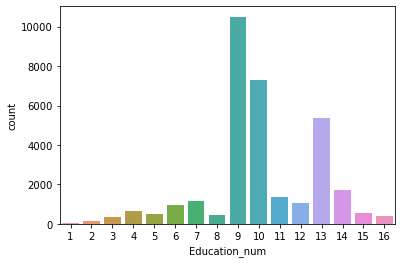

In [167]:
sns.countplot(x=df['Education_num'],data=df)
print(df['Education_num'].value_counts())

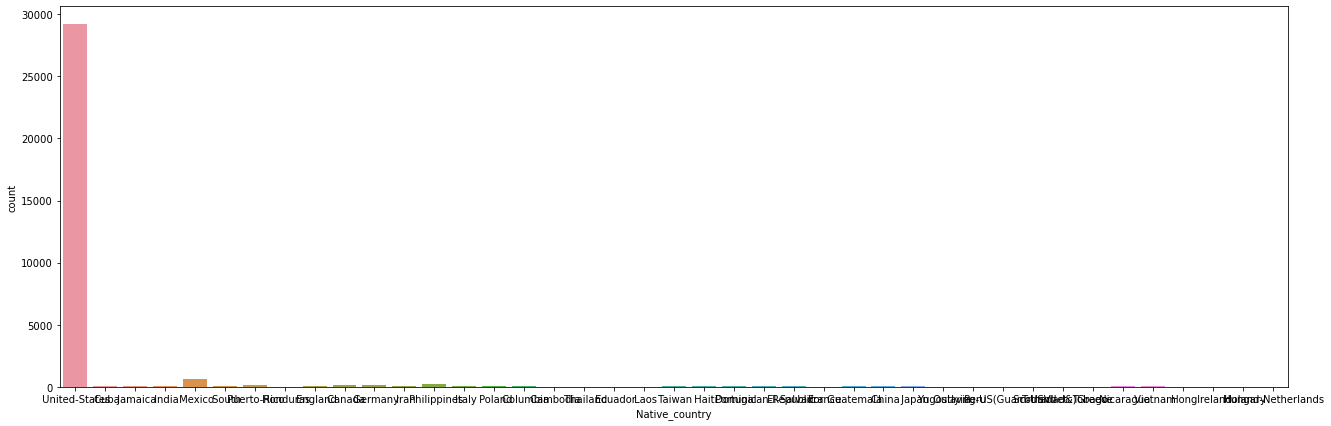

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [168]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Native_country'],data=df)
plt.show()
print(df['Native_country'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


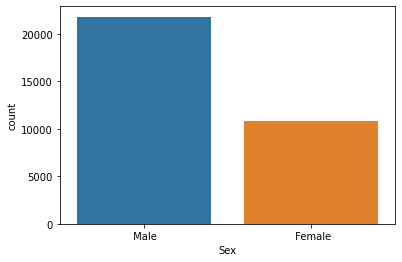

In [169]:
sns.countplot(x=df['Sex'],data=df)
print(df['Sex'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


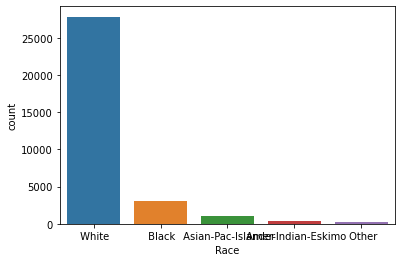

In [170]:
sns.countplot(x=df['Race'],data=df)
print(df['Race'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


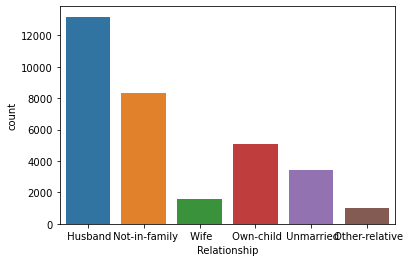

In [171]:
sns.countplot(x=df['Relationship'],data=df)
print(df['Relationship'].value_counts())

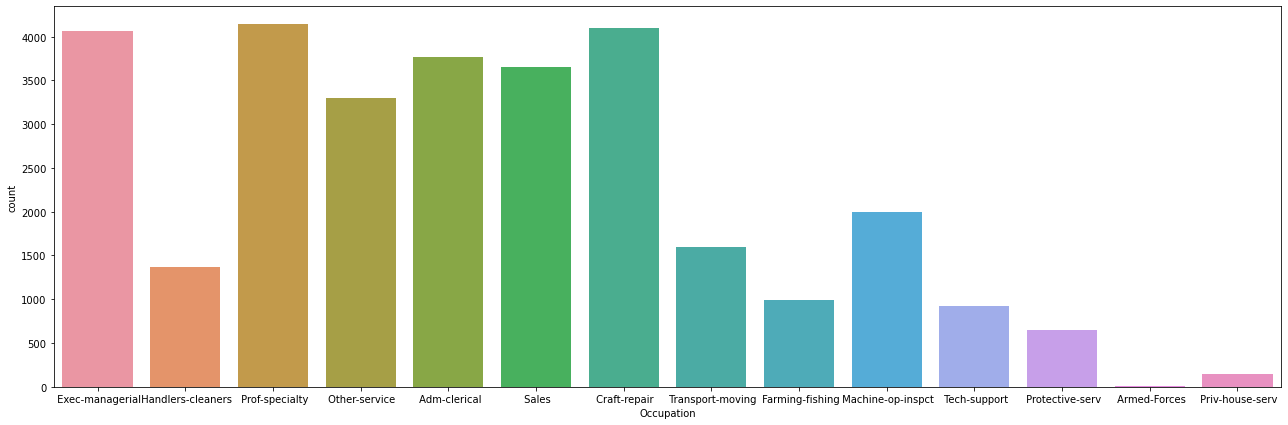

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


In [172]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Occupation'],data=df)
plt.show()
print(df['Occupation'].value_counts())

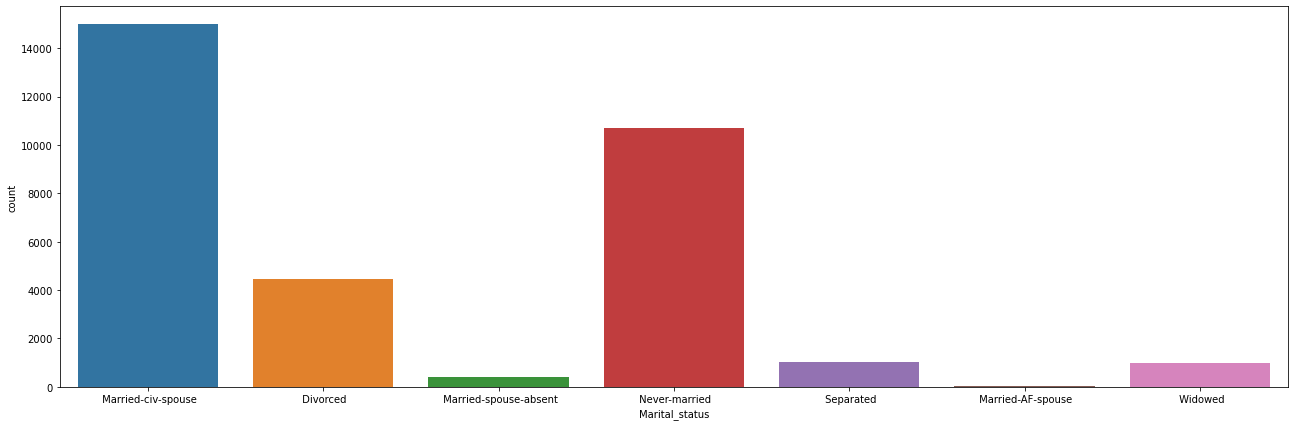

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [173]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Marital_status'],data=df)
plt.show()
print(df['Marital_status'].value_counts())

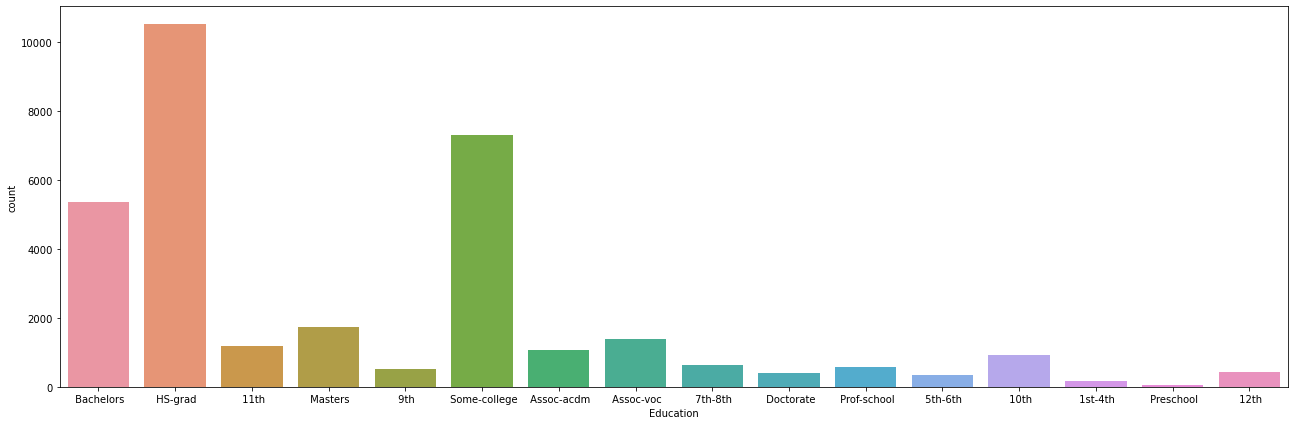

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


In [174]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Education'],data=df)
plt.show()
print(df['Education'].value_counts())

In [175]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

# Removing Nullvalues

In [176]:
df['Workclass']=df['Workclass'].fillna(method='ffill')

In [177]:
df['Occupation']=df['Occupation'].fillna(method='ffill')

In [178]:
df['Native_country']=df['Native_country'].fillna(method='ffill')

Now we remove all the null values

# Checking relationship with Income

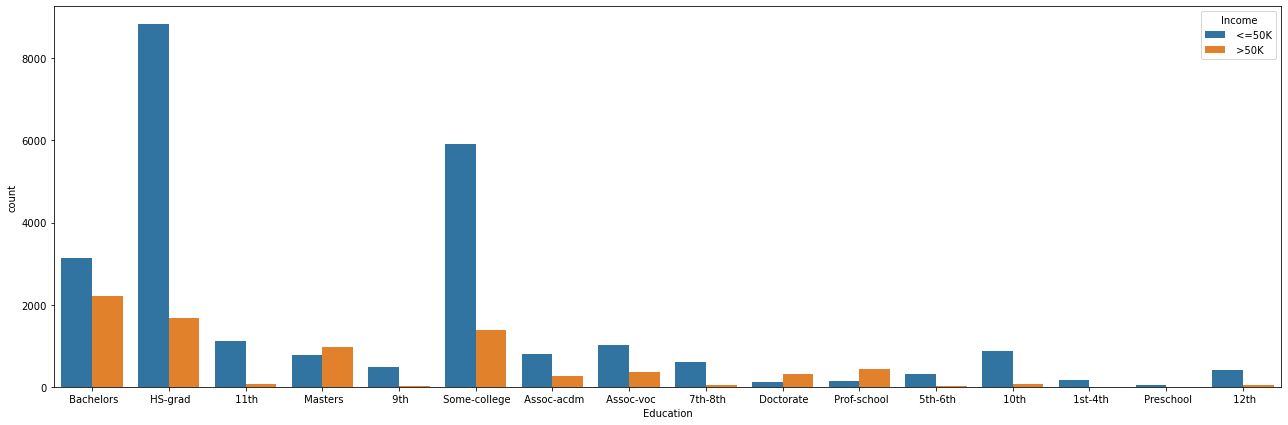

In [179]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Education'],hue=df['Income'],data=df)
plt.show()

Hs-grad,some-college people are most of income below50000.

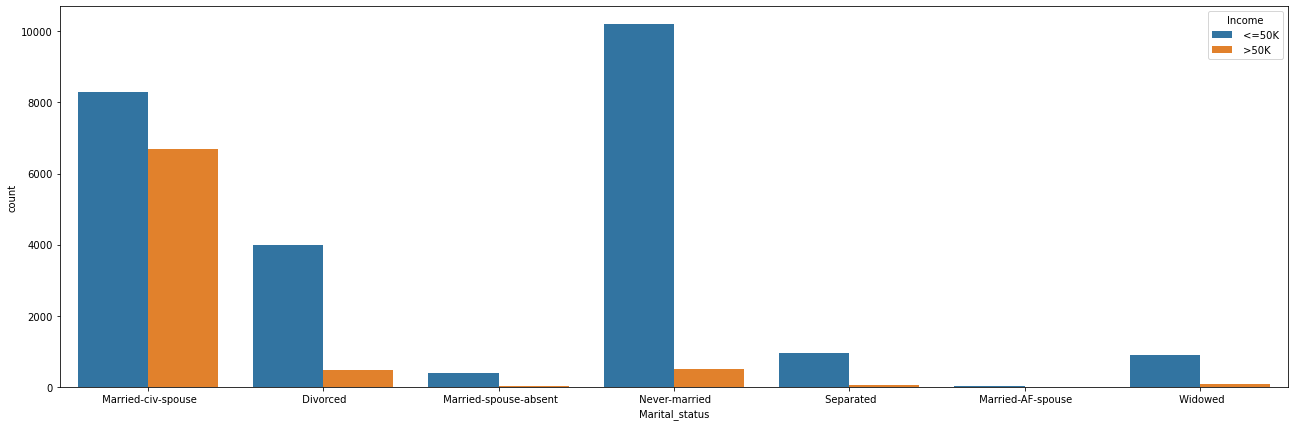

In [180]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Marital_status'],hue='Income',data=df)
plt.show()

Married-civ-spouse have most incomes above 50000 compared to all.
Never-married people have most incomes below 50000 compared to all

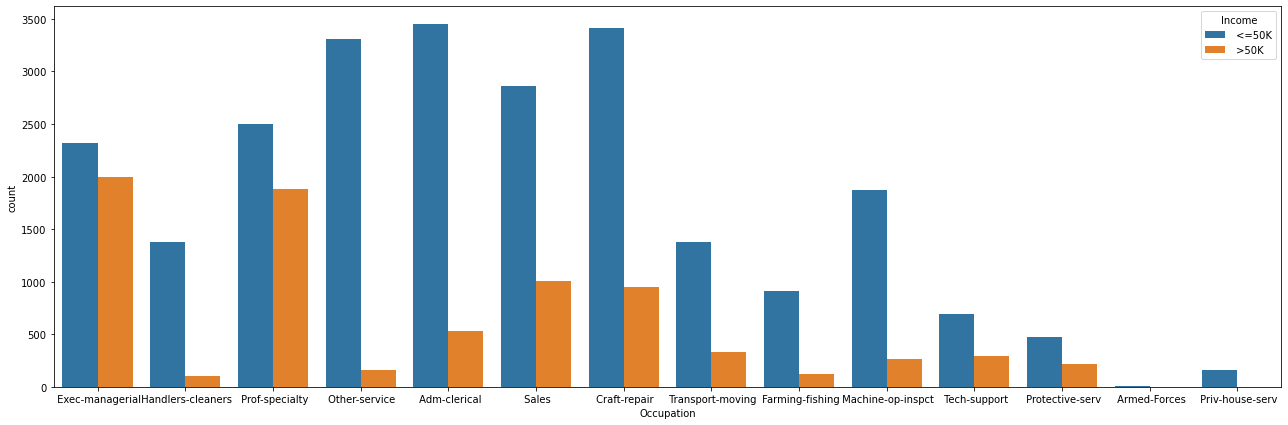

In [181]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Occupation'],hue='Income',data=df)
plt.show()

Most of the Adm-clericaland Craft-repair has income less than 50000.

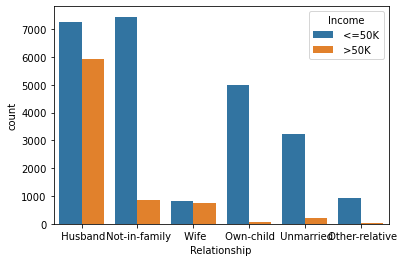

In [182]:
sns.countplot(x=df['Relationship'],hue='Income',data=df)

most of  Not-in-family people have income less 50000.
most of husband catagory have income more than 50000 compared to all.

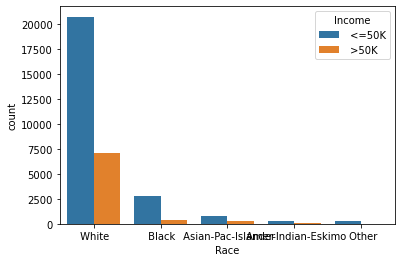

In [183]:
sns.countplot(x=df['Race'],hue='Income',data=df)

Most white have income less than 50000

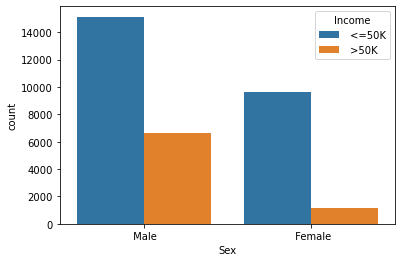

In [184]:
sns.countplot(x=df['Sex'],hue='Income',data=df)



Less Females have income above 50000.
more males have income below 50000.

Converting Catagorial to numeric using LabelEncoder

In [185]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])


Education and Education_num have same meaning.so we drop 1 of them.Weight has no impact on dataset,so we drop it

In [186]:
df=df.drop(['Education','Fnlwgt'],axis=1)
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


# Checking Outlier

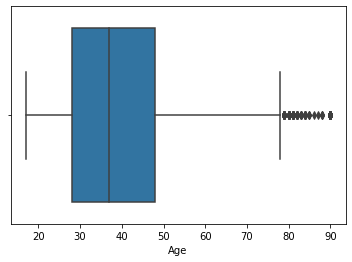

In [187]:
sns.boxplot(df['Age'])

People live till age 90.so no outlier in this column

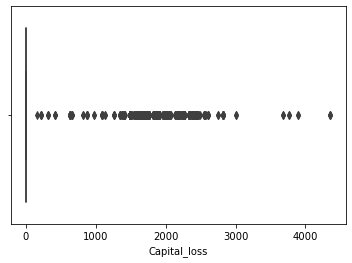

In [188]:
sns.boxplot(df['Capital_loss'])

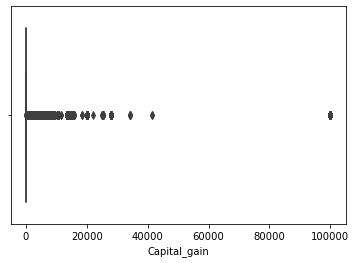

In [189]:
sns.boxplot(df['Capital_gain'])

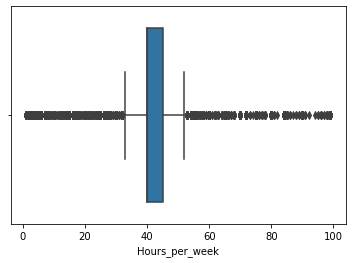

In [190]:
sns.boxplot(df['Hours_per_week'])

In [191]:
df[df['Capital_loss']>3200]

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
8962,90,3,9,6,9,1,4,0,0,4356,40,38,0
11901,34,3,9,0,7,4,4,0,0,3770,45,38,0
12599,74,6,16,4,9,2,4,0,0,3683,20,38,1
14755,82,3,9,6,3,1,4,0,0,4356,18,38,0
15941,38,3,6,5,0,4,4,1,0,3770,40,38,0
20415,54,3,4,0,6,4,4,0,0,3900,40,38,0
23053,68,0,9,0,9,1,4,0,0,3683,40,38,0
23801,41,3,10,5,9,3,4,0,0,3900,40,38,0
30780,66,5,10,6,11,4,2,0,0,4356,40,38,0


In [192]:
df=df.drop([8962,11901,12599,14755,15941,20415,23053,23801,30780],axis=0)

In [193]:
df[df['Capital_gain']>80000]

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1245,54,4,15,2,9,0,4,1,99999,0,60,38,1
1367,52,3,9,2,3,0,1,1,99999,0,40,23,1
1481,53,4,9,2,11,0,4,1,99999,0,40,38,1
1527,52,3,13,2,3,0,4,1,99999,0,50,38,1
1615,46,3,15,2,9,0,4,1,99999,0,60,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31827,47,3,14,2,3,0,4,1,99999,0,55,38,1
31971,43,4,15,2,3,0,4,1,99999,0,40,38,1
32089,66,3,13,2,3,0,4,1,99999,0,55,38,1
32237,47,3,15,2,3,0,4,1,99999,0,40,38,1


In [194]:
df=df[df['Capital_gain']<80000]

In [195]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


In [196]:
dataloss=(32560-32392)/32560
dataloss

0.005159705159705159

after removing rows dataloss is 0.5%

# Checking Corelation

In [197]:
df.corr()['Income']

Age               0.231639
Workclass        -0.003015
Education_num     0.329726
Marital_status   -0.198072
Occupation        0.045255
Relationship     -0.248959
Race              0.072120
Sex               0.214458
Capital_gain      0.310754
Capital_loss      0.156517
Hours_per_week    0.225811
Native_country    0.022608
Income            1.000000
Name: Income, dtype: float64

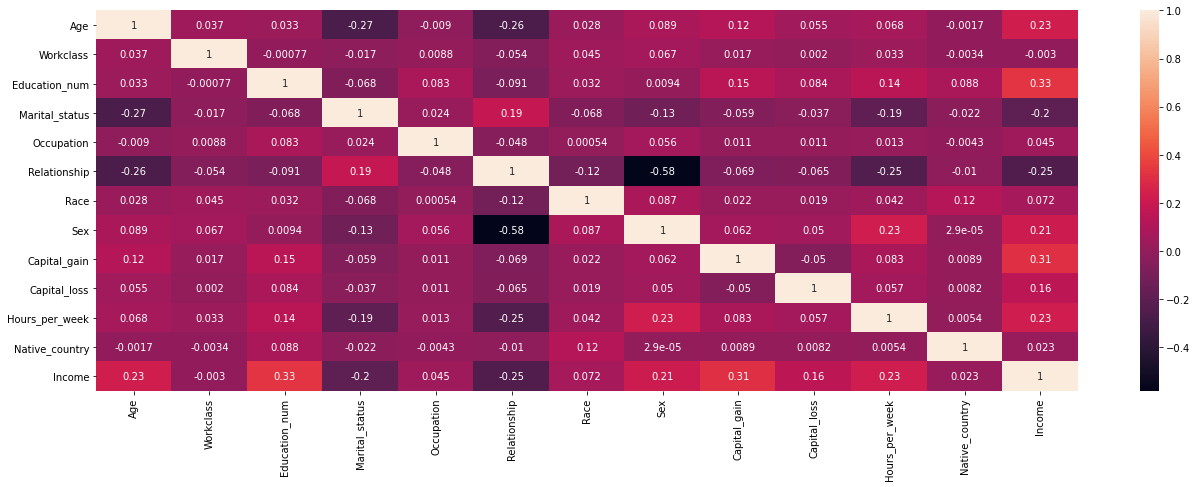

In [198]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Education_num column is highly corelated with Income

# Cheking Skewness

In [199]:
df.skew()

Age               0.561547
Workclass         0.068530
Education_num    -0.317727
Marital_status   -0.017821
Occupation        0.112117
Relationship      0.782209
Race             -2.434272
Sex              -0.715457
Capital_gain      5.838188
Capital_loss      4.511401
Hours_per_week    0.226235
Native_country   -4.184031
Income            1.236177
dtype: float64

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


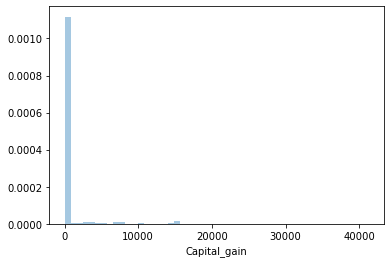

In [200]:
sns.distplot(df['Capital_gain'])

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


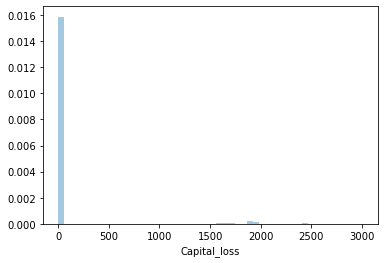

In [201]:
sns.distplot(df['Capital_loss'])

We remove skewness by using power_transform method

In [202]:
from sklearn.preprocessing import power_transform
df['Capital_gain']=power_transform(df[['Capital_gain']])

In [203]:
df['Capital_loss']=power_transform(df[['Capital_loss']])

Divide dataset in dependent and independent variable

In [204]:
x = df.drop('Income',axis=1)
y = df['Income']

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()

choosing best random_state

In [207]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=i)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

best accuracy is 0.8201275982712493 on random_state 95


In [208]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=95)
    

In [209]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [210]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]

In [211]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    

SVC()
0.8242012656274116
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4964
           1       0.75      0.37      0.50      1515

    accuracy                           0.82      6479
   macro avg       0.79      0.67      0.70      6479
weighted avg       0.81      0.82      0.80      6479

[[4777  187]
 [ 952  563]]
DecisionTreeClassifier()
0.8137058187991975
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4964
           1       0.60      0.60      0.60      1515

    accuracy                           0.81      6479
   macro avg       0.74      0.74      0.74      6479
weighted avg       0.81      0.81      0.81      6479

[[4364  600]
 [ 607  908]]


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
0.8120080259299275
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4964
           1       0.66      0.41      0.51      1515

    accuracy                           0.81      6479
   macro avg       0.75      0.67      0.69      6479
weighted avg       0.80      0.81      0.80      6479

[[4638  326]
 [ 892  623]]
GaussianNB()
0.8144775428306837
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4964
           1       0.61      0.56      0.59      1515

    accuracy                           0.81      6479
   macro avg       0.74      0.73      0.73      6479
weighted avg       0.81      0.81      0.81      6479

[[4422  542]
 [ 660  855]]
KNeighborsClassifier()
0.8192622318258991
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4964
           1       0.63      0.56      0.59      1515

    accuracy  

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8689612594536194
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4964
           1       0.77      0.63      0.69      1515

    accuracy                           0.87      6479
   macro avg       0.83      0.79      0.81      6479
weighted avg       0.86      0.87      0.86      6479

[[4670  294]
 [ 555  960]]


# Using Ensemble Algorithm

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8493594690538664
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4964
           1       0.70      0.61      0.66      1515

    accuracy                           0.85      6479
   macro avg       0.80      0.77      0.78      6479
weighted avg       0.84      0.85      0.85      6479

[[4572  392]
 [ 584  931]]


In [214]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
    

0.8677265010032412
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4964
           1       0.77      0.61      0.68      1515

    accuracy                           0.87      6479
   macro avg       0.83      0.78      0.80      6479
weighted avg       0.86      0.87      0.86      6479

[[4693  271]
 [ 586  929]]


In [215]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
y_pred=gc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8649482944898904
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4964
           1       0.78      0.59      0.67      1515

    accuracy                           0.86      6479
   macro avg       0.83      0.77      0.79      6479
weighted avg       0.86      0.86      0.86      6479

[[4708  256]
 [ 619  896]]


# Checking Auc_Roc_score

In [216]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [217]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [218]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [219]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

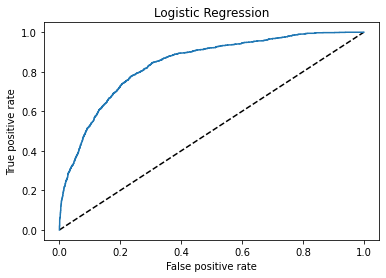

In [220]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [221]:
auc_score=roc_auc_score(y_test,y_pred_prob)
auc_score

0.8407983687168072

In [222]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.8113906467047384


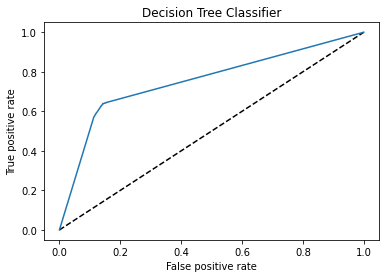

0.7531067248545966

In [223]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decission Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,y_pred_prob)
auc_score

In [224]:
from xgboost import XGBClassifier
ex=XGBClassifier()
ex.fit(x_train,y_train)

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [226]:
y_pred_prob=ex.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

Text(0.5, 1.0, 'xgbclassifier')

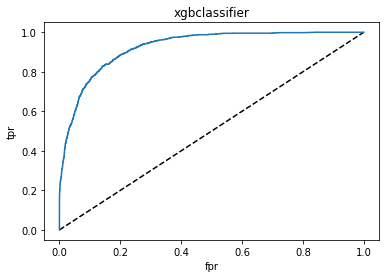

In [227]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("xgbclassifier")

In [228]:
roc_auc_score(y_test,y_pred_prob)

0.9249553218819062

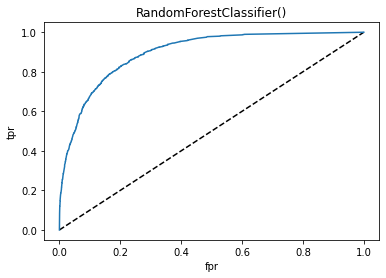

0.8970720541030736


In [229]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(rf)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

From roc_auc score xgbclassifier is best for this dataset.for crosschecking best algorithm we use cross_val_score

choosing best cv for this dataset

In [230]:
from sklearn.model_selection import cross_val_score
svc=SVC()
for i in range(2,5):
    cvscore=cross_val_score(svc,x,y,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.8181649790071623
for 3 accuracy is 0.8201099767211054
for 4 accuracy is 0.8201407755001234


cv=4

In [231]:
svc=SVC()
dt=DecisionTreeClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier()
ex=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
lg=LogisticRegression()

In [232]:
model=[svc,dt,gn,knn,ex,rf,ad,gd,lg]

In [233]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=4)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of SVC() is 0.8201407755001234
accuracy score of DecisionTreeClassifier() is 0.8061249691281798
accuracy score of GaussianNB() is 0.8069893800938504
accuracy score of KNeighborsClassifier() is 0.810477895776735
[12:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score of XGBClassifier(base_score=None, booster=None, colsamp

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

accuracy score of LogisticRegression() is 0.8103852803161273


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


from cv score and roc_auc curve we conclude that xgbclassifier is best model for this dataset

# HyperParameter Tuning

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
param={'max_depth':range(1,11,2),'min_child_weight':[4,5,6,7,8]}

In [236]:
gscv=GridSearchCV(ex,param,cv=7)
gscv.fit(x_train,y_train)

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [237]:
gscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
gscv.best_params_

{'max_depth': 5, 'min_child_weight': 6}

In [239]:
gscv.best_score_

0.8640836961247977

In [240]:
from xgboost import XGBClassifier

In [241]:
ex=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=6, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
ex.fit(x_train,y_train)
y_pred=ex.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[12:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8755980861244019
[[4687  277]
 [ 529  986]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4964
           1       0.78      0.65      0.71      1515

    accuracy                           0.88      6479
   macro avg       0.84      0.80      0.82      6479
weighted avg       0.87      0.88      0.87      6479



# Saving Model

In [242]:
import joblib
joblib.dump(ex,'cencusincome.obj')


['cencusincome.obj']